Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and
advertising platform selection.In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential.
Let's embark on the journey of sales prediction using machine learning in Python.

### Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('../input/advertising-dataset/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


The sales are in thousands of units and the budget is in thousands of dollars.

### Data Preprocessing:

In [3]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 200

Number of features: 4

Features:
['TV', 'Radio', 'Newspaper', 'Sales']

Missing values: 0

Unique values:
TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Exploratory Data Analysis:

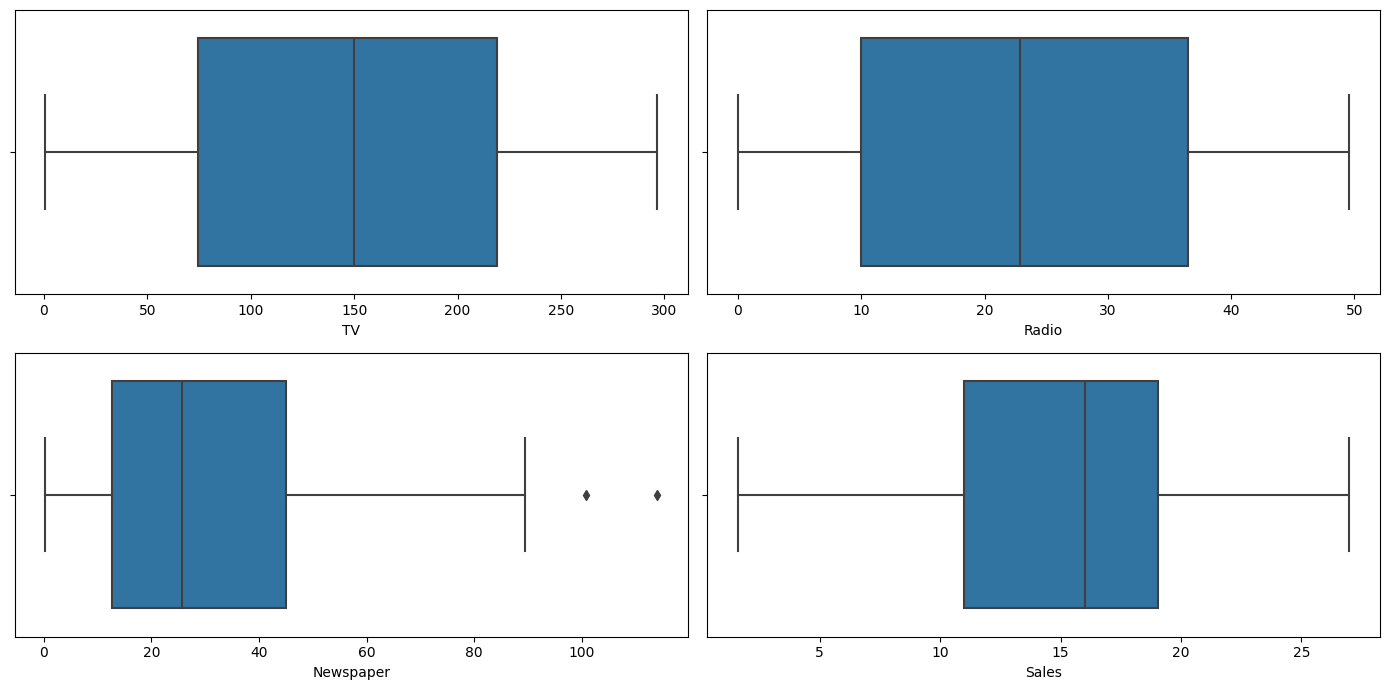

In [6]:
# Create boxplot to find outliers in data set
plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
sns.boxplot(x=df['TV'])

plt.subplot(2,2,2)
sns.boxplot(x=df['Radio'])

plt.subplot(2,2,3)
sns.boxplot(x=df['Newspaper'])

plt.subplot(2,2,4)
sns.boxplot(x=df['Sales'])

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


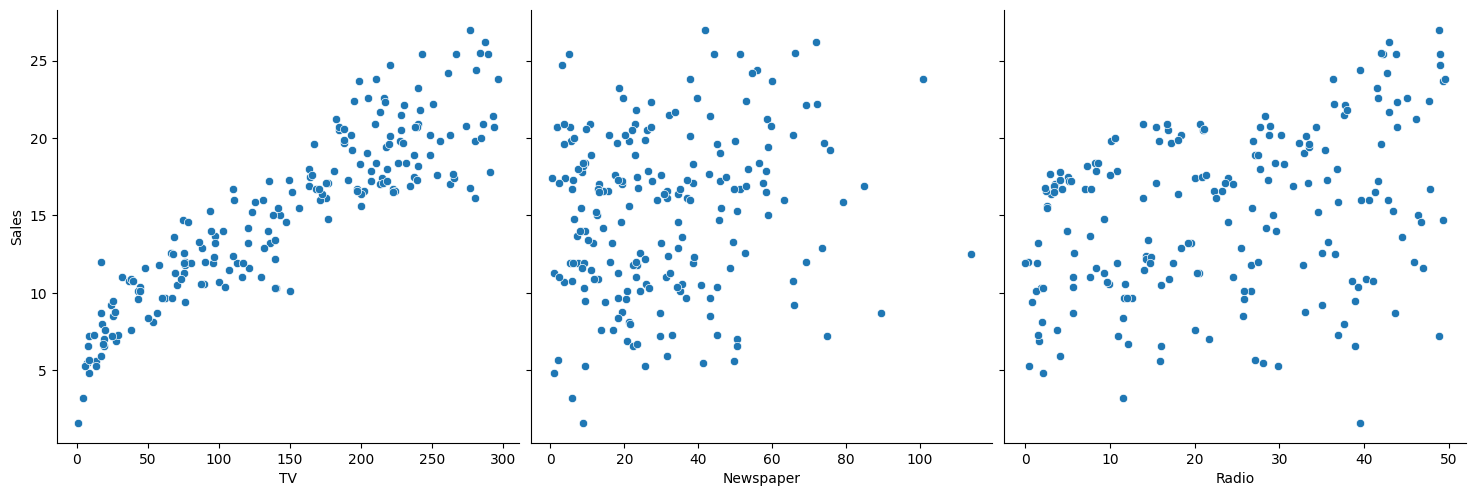

In [7]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

1. The relation between TV and Sales is stong and increases in linear fashion
2. The relation between Radio and Sales is less stong
3. The relation between Newspaper and Sales is weak

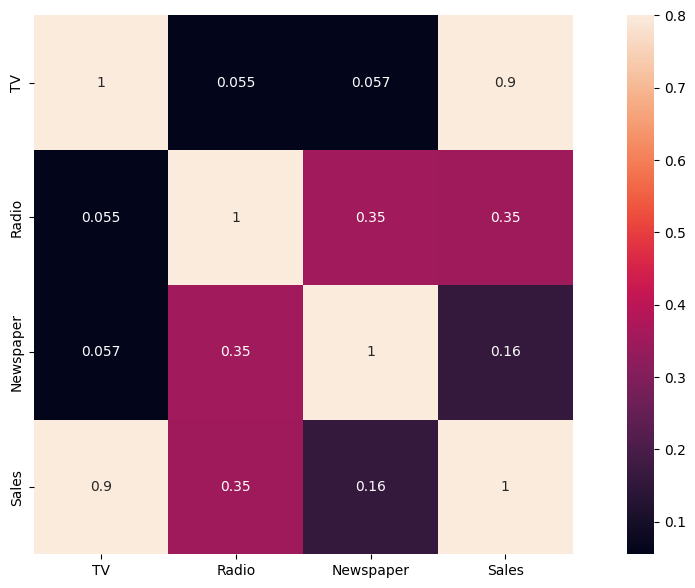

In [8]:
# Let's see the correlation between different variables.
corrmat = df.corr()
fig = plt.figure(figsize=(14,7))

sns.heatmap(corrmat,vmax = .8 , square = True, annot = True)
plt.show()

TV seems to be most correlated with Sales

### Feature Engineering:

In [9]:
X = df.drop('Sales',axis=True)
y = df['Sales']

In [10]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [12]:
# Split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.25, random_state = 20)

### Model Building:

In [13]:
# Create a pipeline with standard scaling and SGD regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=10000, random_state=1000))
])

In [14]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

In [15]:
# Predict ratings on the test set
y_pred_pipeline = pipeline.predict(X_test)

### Model Evaluation:

In [16]:
# Evaluation Metrics for the Pipeline
mae_pipeline = mean_absolute_error(Y_test, y_pred_pipeline)
mse_pipeline = mean_squared_error(Y_test, y_pred_pipeline)
r2_pipeline = r2_score(Y_test, y_pred_pipeline)

In [17]:
print("Pipeline Mean Absolute Error:", mae_pipeline)
print("Pipeline Mean Squared Error:", mse_pipeline)
print("Pipeline R-squared:", r2_pipeline)

Pipeline Mean Absolute Error: 1.6215896343038763
Pipeline Mean Squared Error: 4.722398737093801
Pipeline R-squared: 0.8664344012090088


### Model Deployment:

In [18]:
# Take user input for prediction
new_input = pd.DataFrame({
    'TV': [10000],         
    'Radio': [300],       
    'Newspaper': [700],       
})

# Use the trained pipeline to make predictions on the input
predicted_sales = pipeline.predict(new_input)
rounded_sales = round(predicted_sales[0], 2)

print(f"Predicted Sales:${rounded_sales}k")

Predicted Sales:$567.97k
